# Imports and Datasets


In [6]:
# Imports
import numpy as np
import pandas as pd
from time import time

# Scikit-learn stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [7]:
# Get conductange range data from file set_sweep.csv
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


In [8]:
data = pd.read_csv("/content/reset_sweep.tsv", sep='\t', names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,9726.189563,10018.123665
1,2,2.000000e-08,0.5,1.0,9867.379098,9836.066607
2,4,2.000000e-08,0.5,1.5,9773.081709,9902.969536
3,6,2.000000e-08,0.5,2.0,9555.136969,9373.063191
4,8,2.000000e-08,0.5,2.5,9598.105929,9840.417267
5,10,2.000000e-08,0.5,3.0,10154.120560,10130.418229
6,12,2.000000e-08,0.6,0.5,9576.502084,9832.650784
7,14,2.000000e-08,0.6,1.0,8517.708010,8714.310288
8,16,2.000000e-08,0.6,1.5,8885.389926,9046.957580
9,18,2.000000e-08,0.6,2.0,8513.328536,8321.666349


# Data Preprocessing

Let us first convert resistance values (pre-read and post-read) to conductance values, and scale each column so that the maximum value is 1.

In [9]:
# Convert resistance to conductance
data['preread'] = 1 / data['preread']
data['postread'] = 1 / data['postread']

In [10]:
# Creating scaled versions of the columns which have very large or very small scales
data['scaled_pw'] = data['pw'] / np.max(data['pw'])
data['scaled_preread'] = data['preread'] / np.max(data['preread'])
data['scaled_postread'] = data['postread'] / np.max(data['postread'])

In [11]:
# Take a peek at the preprocessed data
data.head(20)

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
0,0,2.000000e-08,0.5,0.5,0.000103,0.000100,0.01,0.652873,0.602074
1,2,2.000000e-08,0.5,1.0,0.000101,0.000102,0.01,0.643531,0.613218
2,4,2.000000e-08,0.5,1.5,0.000102,0.000101,0.01,0.649740,0.609075
3,6,2.000000e-08,0.5,2.0,0.000105,0.000107,0.01,0.664560,0.643509
4,8,2.000000e-08,0.5,2.5,0.000104,0.000102,0.01,0.661585,0.612947
5,10,2.000000e-08,0.5,3.0,0.000098,0.000099,0.01,0.625358,0.595400
6,12,2.000000e-08,0.6,0.5,0.000104,0.000102,0.01,0.663077,0.613431
7,14,2.000000e-08,0.6,1.0,0.000117,0.000115,0.01,0.745501,0.692155
8,16,2.000000e-08,0.6,1.5,0.000113,0.000111,0.01,0.714652,0.666705
9,18,2.000000e-08,0.6,2.0,0.000117,0.000120,0.01,0.745885,0.724813


### Train Test Split
Here, we make a 70%-30% split of the data into training and testing datasets

In [12]:
# Train-test 70%-30% split
x = data[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = data["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Training/Testing Model

In [13]:
# Training the MLP regressor
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(45, 23),
        learning_rate_init=0.03,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train, y_train)
print(f"Done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.5f}")

Training MLPRegressor...
Done in 3.510s
Test R2 score: 0.60119


In [14]:
# Root Mean Squared Error (RMSE) on training dataset
predictions = est.predict(X_train)
mean_squared_error(y_train, predictions, squared=False)

0.041820615218246586

In [15]:
# Mean Squared Error (MSE) on training dataset
mean_squared_error(y_train, predictions, squared=True)

0.0017489638572326378

In [16]:
# Root Mean Squared Error (RMSE) on testing dataset
predictions = est.predict(X_test)
predictions_orig = est.predict(X_test)
mean_squared_error(y_test, predictions, squared=False)

0.04170019198952083

In [17]:
y_test_orig = y_test

In [18]:
# Mean Squared Error (MSE) on testing dataset
mean_squared_error(y_test, predictions, squared=True)

0.0017389060119628974

### Testing on subset of testing data where there was a significant change in conductance (>= 50%)

In [19]:
# Filter the testing data to a subset
# Condition: |preread - postread| >= 50%
condition = (np.abs(X_test[:,0] - y_test) >= 0.5)
cond_X_test, cond_y_test = X_test[condition], y_test[condition]
cond_X_test, cond_y_test

(array([[0.66111483, 0.5       , 3.3       , 3.        ],
        [0.66379318, 1.        , 3.2       , 3.        ],
        [0.70127194, 1.        , 2.9       , 3.        ],
        [0.69663342, 0.5       , 3.2       , 3.        ],
        [0.73510417, 0.5       , 2.9       , 3.        ],
        [0.67853524, 1.        , 2.5       , 3.        ],
        [0.76459209, 1.        , 3.2       , 3.        ],
        [0.66774132, 1.        , 3.        , 3.        ],
        [0.66258675, 1.        , 3.3       , 3.        ],
        [0.69168001, 1.        , 2.6       , 3.        ],
        [0.68577619, 1.        , 3.3       , 3.        ],
        [0.64819991, 0.5       , 2.9       , 3.        ],
        [0.82770967, 1.        , 2.7       , 3.        ],
        [0.71040515, 1.        , 3.3       , 3.        ]]),
 array([0.14190148, 0.1626192 , 0.1045876 , 0.19321496, 0.15340063,
        0.16902692, 0.20355361, 0.1650402 , 0.12579359, 0.18563967,
        0.13951739, 0.14496318, 0.29503389, 0.1219

In [20]:
# Root Mean Squared Error (RMSE) on training dataset
predictions = est.predict(X_train)
mean_squared_error(y_train, predictions, squared=False)

0.041820615218246586

In [21]:
# Mean Squared Error (MSE) on training dataset
mean_squared_error(y_train, predictions, squared=True)

0.0017489638572326378

In [22]:
# Root Mean Squared Error (RMSE) on testing dataset
predictions = est.predict(cond_X_test)
mean_squared_error(cond_y_test, predictions, squared=False)

0.40251856975808065

In [23]:
# Mean Squared Error (MSE) on testing dataset
mean_squared_error(cond_y_test, predictions, squared=True)

0.16202119900009082

### Testing on subset of testing data where there was a miniscule change in conductance (<= 5%)

In [24]:
# Filter the testing data to a subset
# NOTE: the first column of X_test is preread conductance
# Condition: |preread - postread| <= 5%
condition = (np.abs(X_test[:,0] - y_test) <= 0.05)
cond_X_test, cond_y_test = X_test[condition], y_test[condition]
cond_X_test, cond_y_test

(array([[0.71827266, 0.2       , 3.3       , 3.        ],
        [0.66499985, 0.5       , 1.8       , 2.        ],
        [0.68991339, 0.02      , 2.8       , 2.5       ],
        ...,
        [0.64270547, 0.1       , 1.1       , 2.5       ],
        [0.84469028, 1.        , 2.2       , 2.5       ],
        [0.73692549, 0.1       , 2.8       , 3.        ]]),
 array([0.69400085, 0.64989859, 0.67550853, ..., 0.63111104, 0.85131999,
        0.70778628]))

In [25]:
# Root Mean Squared Error (RMSE) on training dataset
predictions = est.predict(X_train)
mean_squared_error(y_train, predictions, squared=False)

0.041820615218246586

In [26]:
# Mean Squared Error (MSE) on training dataset
mean_squared_error(y_train, predictions, squared=True)

0.0017489638572326378

In [27]:
# Root Mean Squared Error (RMSE) on testing dataset
predictions = est.predict(cond_X_test)
mean_squared_error(cond_y_test, predictions, squared=False)

0.026237399351757996

In [28]:
# Mean Squared Error (MSE) on testing dataset
mean_squared_error(cond_y_test, predictions, squared=True)

0.000688401124743631

In [36]:
#NOTE
#set_sweep mse was 0.0604 for overall test data, 0.0505 for >=50% data, 0.0466 for <=5% data
#reset_sweep mse was 0.0417 for overall test data, 0.4025 for >=50% data, 0.0262 for <=5% data

#Visualizations

In [37]:
#plot predicted conductance values vs real conductance values
df2 = pd.DataFrame(list(zip(y_test_orig, predictions_orig)), columns = ["real","predicted"])
df2

,real,predicted
0,0.609540,0.648763
1,0.694001,0.629363
2,0.649899,0.638597
3,0.675509,0.657716
4,0.616065,0.616976
...,...,...
9826,0.631111,0.621717
9827,0.631509,0.660261
9828,0.851320,0.794484
9829,0.669521,0.682672


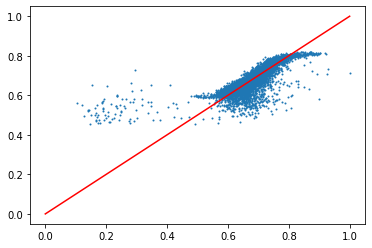

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df2["real"], df2["predicted"], s=1)
plt.plot([0, 1], [0, 1], "r")

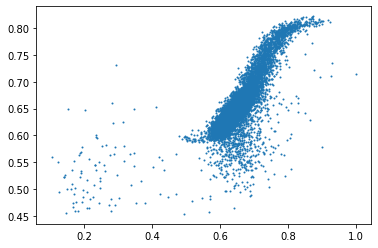

In [41]:
plt.scatter(df2["real"], df2["predicted"], s=1)

In [56]:
#attempt to graph a curve but didn't work ("ValueError: Expect x to be a 1-D sorted array_like.")
from scipy.interpolate import make_interp_spline

x = np.array(df2["real"])
y = np.array(df2["predicted"])
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.scatter(X_, Y_, s=1)

ValueError: ignored